### Questions
###### 1. What is the conversion rate (percentage of clients that contracted a personal loan) of the marketing campaign?
###### 2. How are the different variables (age, income, education, etc.) distributed in the dataset?
###### 3. How do the different variables interact with each other?
###### 4. Are age, income, education, etc. distributed similarly for customers who have security accounts and those who don't?
###### 5. Are age, income, education, etc. distributed similarly for customers who have CD accounts and those who don't?
###### 6. How many customers have one account only? How many have multiple accounts (i.e., both security and CD accounts)?
###### 7. What are the most important factors that lead to customers responding favorably to the marketing campaign?
###### 8. (Optional) Build a simple machine learning classification model that predicts, based on a customer's features, if they will respond to the marketing campaign or not.


In [1]:
# Importing the dataset
import pandas as pd

personal_loan = pd.read_csv("loans.txt", sep=",")
print(personal_loan.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [12]:
# Checking for missing values and data types before analysis
missing_values = personal_loan.isnull().sum()
print("Missing values per column:\n", missing_values)

print("\nData Types of Each Column:\n", personal_loan.dtypes)

Missing values per column:
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Data Types of Each Column:
 ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


##### Q1 Conversion rate

In [16]:
conversion_rate = (personal_loan["Personal Loan"].sum() / len(personal_loan)) * 100
print(f"\nConversion rate: {conversion_rate:.2f}%")


Conversion rate: 9.60%


##### Q2 Distribution of variables

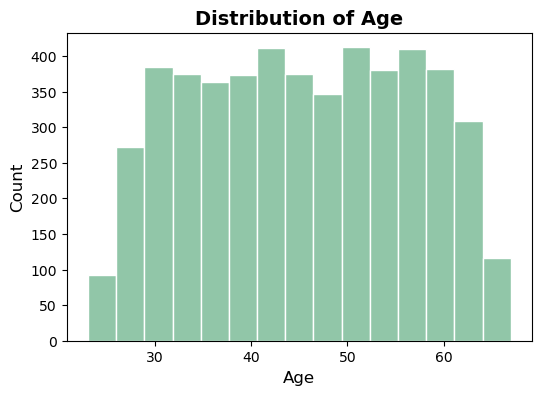

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(personal_loan["Age"], bins=15, color="#6DB48B", edgecolor="white")
plt.title("Distribution of Age", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(False)
plt.tick_params(axis='both', labelsize=10)
plt.show()


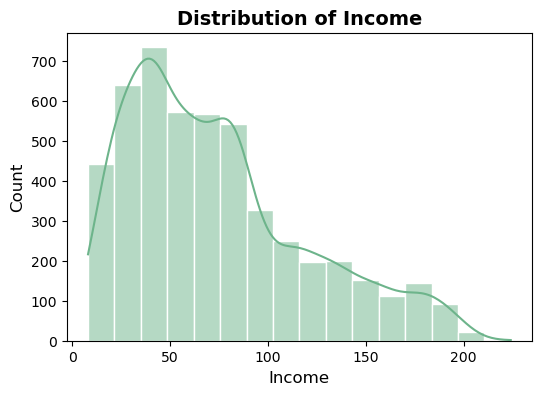

In [89]:
# Distribution of Income
plt.figure(figsize=(6,4))

sns.histplot(personal_loan["Income"], bins=16, color="#6DB48B", edgecolor="white", kde=True)

plt.title("Distribution of Income", fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(False)
plt.tick_params(axis='both', labelsize=10)
plt.show()

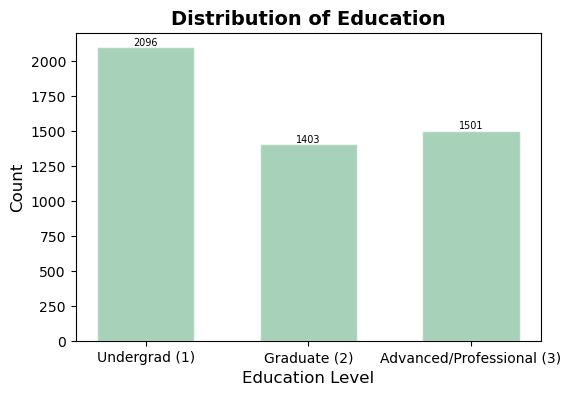

In [178]:
# Distribution of Education
education_counts = personal_loan["Education"].value_counts().sort_index()

plt.figure(figsize=(6,4))
bars = plt.bar(education_counts.index, education_counts.values, 
               color="#6DB48B", edgecolor="white", width=0.6, alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,   
             f"{int(height)}", ha='center', va='bottom', fontsize=7, fontweight='light')

plt.title("Distribution of Education", fontsize=14, fontweight='bold')
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([1, 2, 3], ["Undergrad (1)", "Graduate (2)", "Advanced/Professional (3)"], fontsize=10)
plt.grid(False)
plt.tick_params(axis='y', labelsize=10)
plt.show()

##### Q3 Interaction between different variables

##### Distribution comparison by Security Account status

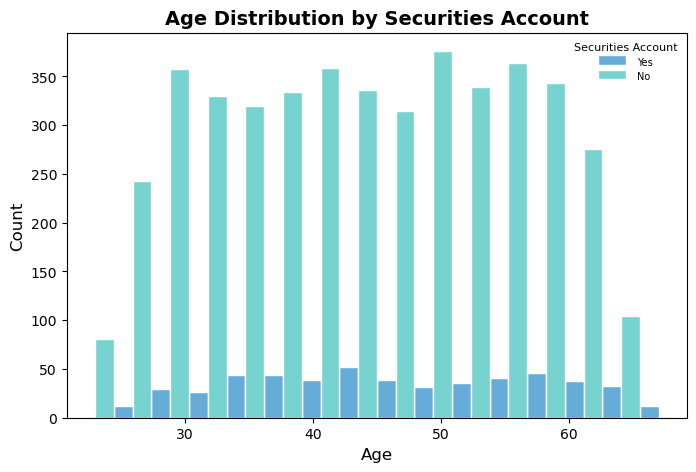

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#1BB6AFFF", "#0076C0FF"]  

# Age distribution by Security Account
plt.figure(figsize=(8, 5))
sns.histplot(data=personal_loan, x="Age", hue="Securities Account", hue_order=[0, 1],
            multiple="dodge", bins=15, alpha=0.6, edgecolor="white",
            palette=colors)  
plt.title("Age Distribution by Securities Account", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tick_params(labelsize=10)

legend = plt.legend(title="Securities Account", labels=['Yes', 'No'], frameon=False,
                   borderpad=0.2,
                   labelspacing=0.2)
plt.setp(legend.get_title(), fontsize=8)
plt.setp(legend.get_texts(), fontsize=7)

plt.show()



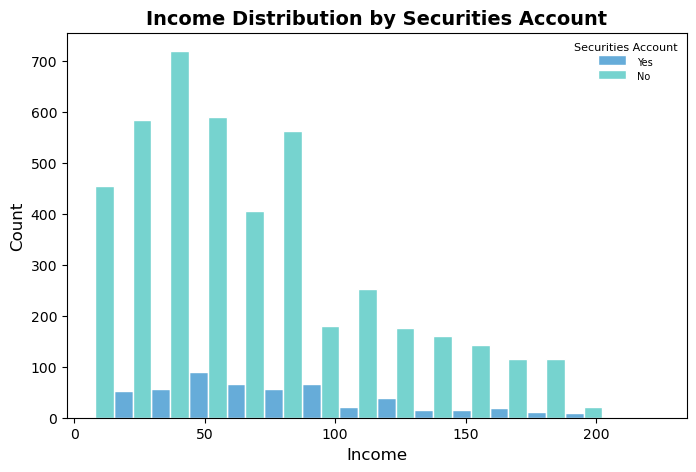

In [262]:
# Income distribution by Security Account
plt.figure(figsize=(8, 5))
sns.histplot(data=personal_loan, x="Income", hue="Securities Account", hue_order=[0, 1],
            multiple="dodge", bins=15, alpha=0.6, edgecolor="white",
            palette=colors)  
plt.title("Income Distribution by Securities Account", fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tick_params(labelsize=10)
legend = plt.legend(title="Securities Account", labels=['Yes', 'No'], frameon=False,
                   borderpad=0.2,
                   labelspacing=0.2)
plt.setp(legend.get_title(), fontsize=8)
plt.setp(legend.get_texts(), fontsize=7)
plt.show()

##### Age distribution by Security Account with normalized percentages

,Mean Age,Median Age,Std Age
Securities Account,,,
No,45.3,45.0,11.5
Yes,45.3,45.0,11.4


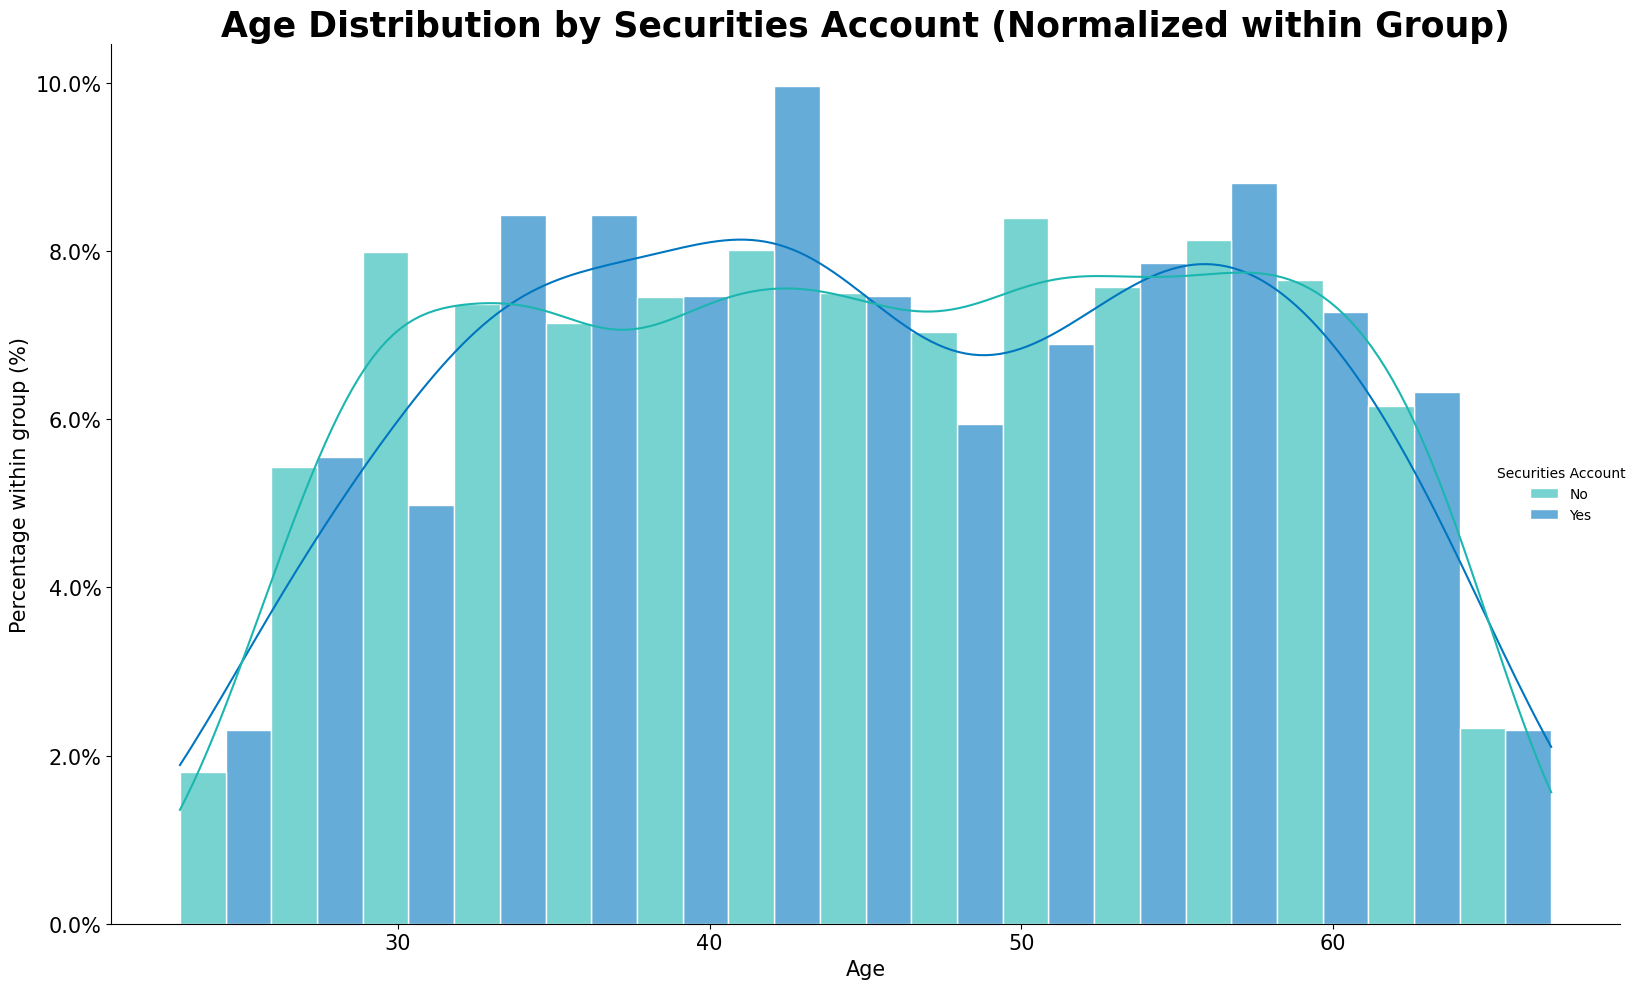

In [275]:
from matplotlib.ticker import PercentFormatter

age_distribution = sns.displot(
    data=personal_loan,
    x="Age",
    hue="Securities Account",
    stat="percent",
    hue_order=[0, 1],  
    common_norm=False,
    multiple="dodge",
    bins=15,
    kind="hist",  
    kde=True,     
    height=10,
    aspect=1.5,
    alpha=0.6,
    edgecolor="white",
    palette=colors
)

plt.title

new_labels = ['No', 'Yes']  
for t, l in zip(age_distribution._legend.texts, new_labels):
    t.set_text(l)

plt.title("Age Distribution by Securities Account (Normalized within Group)", fontsize=25, fontweight='bold')
plt.xlabel("Age", fontsize=15)
plt.ylabel("Percentage within group (%)", fontsize=15)

age_distribution.ax.yaxis.set_major_formatter(PercentFormatter())
plt.tick_params(labelsize=15)
plt.grid(False)
plt.tight_layout()
# Summary statistics table for Age by Securities Account
stats_data = []
for sec_value, label in [(0, "No"), (1, "Yes")]:
    group_data = personal_loan[personal_loan["Securities Account"] == sec_value]["Age"]
    stats_data.append({
        'Securities Account': label,
        'Mean Age': f"{group_data.mean():.1f}",
        'Median Age': f"{group_data.median():.1f}",
        'Std Age': f"{group_data.std():.1f}"
    })
stats_df = pd.DataFrame(stats_data)
stats_df.set_index('Securities Account', inplace=True)
display(stats_df.style.set_caption("Age Statistics by Securities Account Group"))

##### Income distribution by Security Account with normalized percentages

,Mean Income,Median Income,Std Income
Securities Account,,,
No,73.8,64.0,46.2
Yes,73.4,65.0,44.5


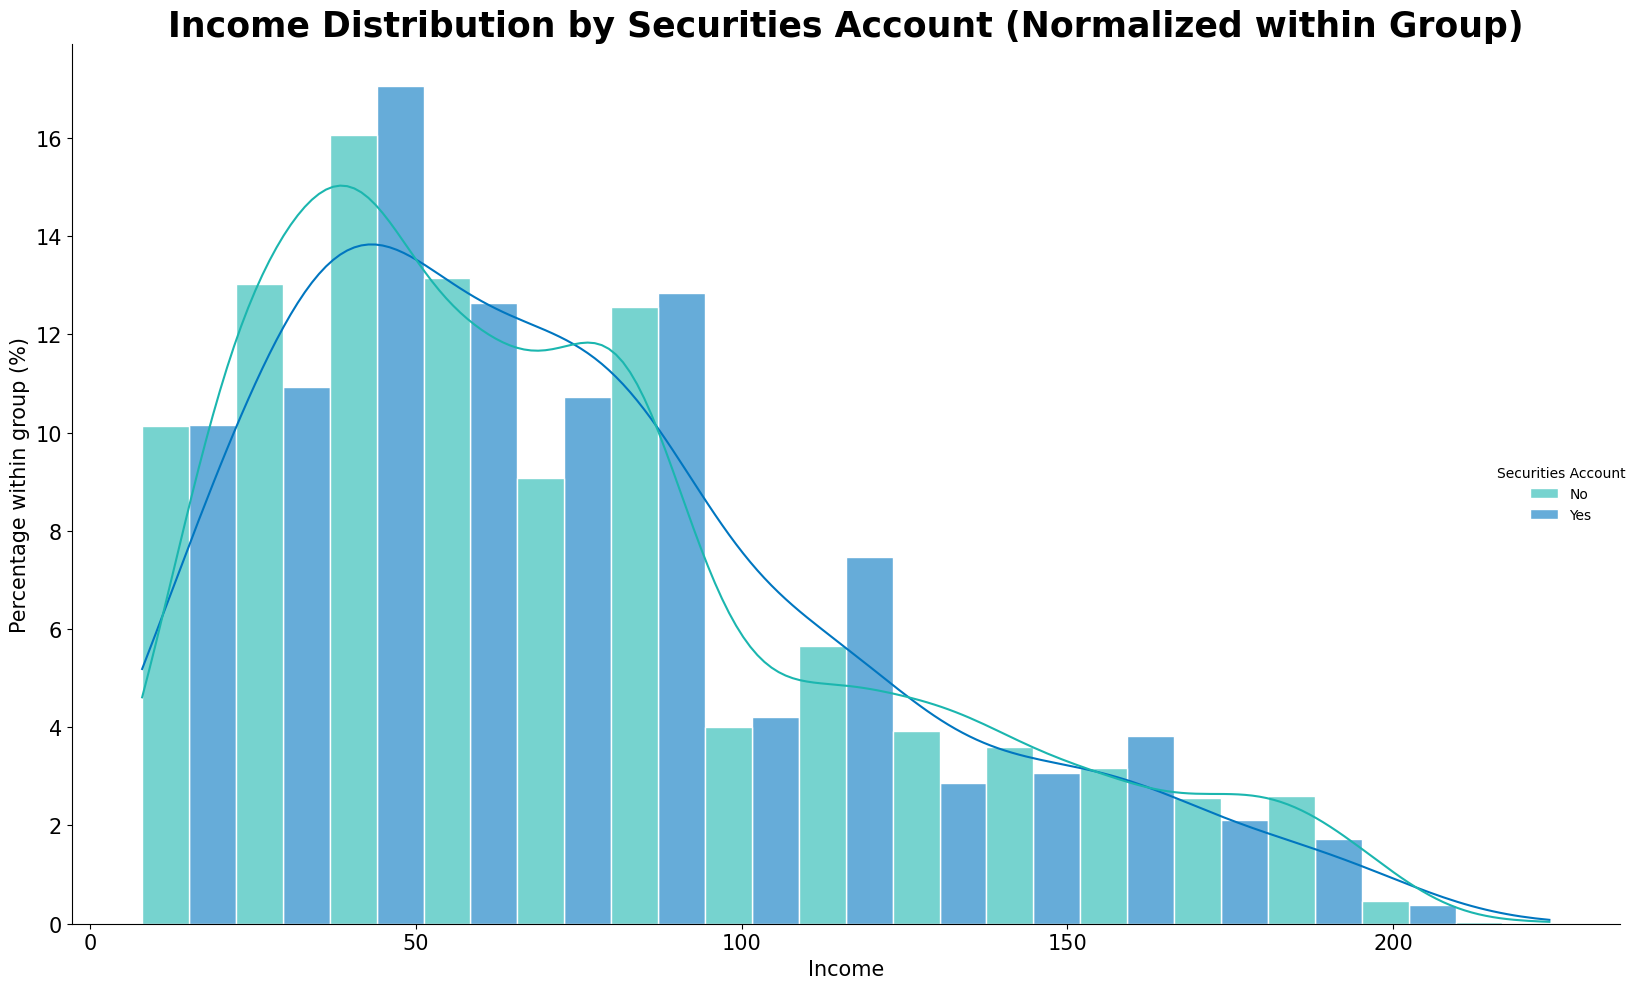

In [277]:
income_distribution = sns.displot(
    data=personal_loan,
    x="Income",
    hue="Securities Account",
    stat="percent",
    hue_order=[0, 1],  
    common_norm=False,
    multiple="dodge",
    bins=15,
    kind="hist",  
    kde=True,     
    height=10,
    aspect=1.5,
    alpha=0.6,
    edgecolor="white",
    palette=colors
)

plt.title

new_labels = ['No', 'Yes']  
for t, l in zip(income_distribution._legend.texts, new_labels):
    t.set_text(l)

plt.title("Income Distribution by Securities Account (Normalized within Group)", fontsize=25, fontweight='bold')
plt.xlabel("Income", fontsize=15)
plt.ylabel("Percentage within group (%)", fontsize=15)

age_distribution.ax.yaxis.set_major_formatter(PercentFormatter())
plt.tick_params(labelsize=15)
plt.grid(False)
plt.tight_layout()

# Summary statistics table for Income by Securities Account
stats_data = []
for sec_value, label in [(0, "No"), (1, "Yes")]:
    group_data = personal_loan[personal_loan["Securities Account"] == sec_value]["Income"]
    stats_data.append({
        'Securities Account': label,
        'Mean Income': f"{group_data.mean():.1f}",
        'Median Income': f"{group_data.median():.1f}",
        'Std Income': f"{group_data.std():.1f}"
    })
stats_df = pd.DataFrame(stats_data)
stats_df.set_index('Securities Account', inplace=True)
display(stats_df.style.set_caption("Income Statistics by Securities Account Group"))

##### The distribution of Education by Security Account status

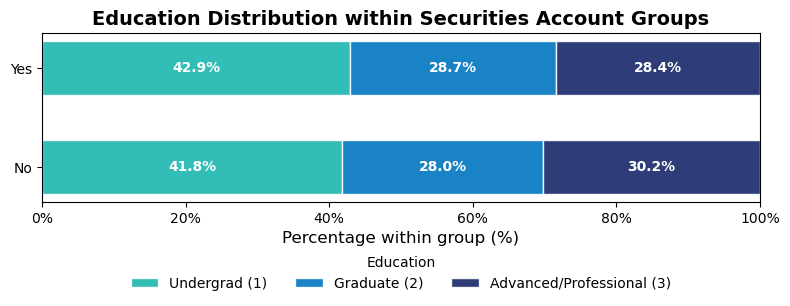

,Undergrad,Graduate,Advanced/Professional,Total,Average Education Level
No,"1,872","1,253","1,353","4,478",1.88
Yes,224,150,148,522,1.85


In [ ]:
import numpy as np

education_distribution = pd.crosstab(
    personal_loan["Securities Account"],
    personal_loan["Education"],
    normalize="index"
) * 100
education_distribution = education_distribution[[1, 2, 3]] 

group_labels = education_distribution.index.map({0: "No", 1: "Yes"})           
seg_labels   = ["Undergrad (1)", "Graduate (2)", "Advanced/Professional (3)"]
colors       = ["#1BB6AFFF", "#0076C0FF", "#172869FF"]

fig, ax = plt.subplots(figsize=(8, 4))
left = np.zeros(len(education_distribution))  

for i, col in enumerate(education_distribution.columns):
    vals = education_distribution[col].values
    bars = ax.barh(group_labels, vals, left=left, height=0.55,
                   color=colors[i], edgecolor="white", alpha=0.9, label=seg_labels[i])
    for b, v in zip(bars, vals):
        if v >= 3:  
            ax.text(b.get_x() + b.get_width()/2, b.get_y() + b.get_height()/2,
                    f"{v:.1f}%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    left += vals

ax.set_xlim(0, 100)
ax.xaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel("Percentage within group (%)", fontsize=12)
ax.set_title("Education Distribution within Securities Account Groups", fontsize=14, fontweight="bold")
ax.grid(False)
ax.legend(title="Education", ncol=3, bbox_to_anchor=(0.5, -0.6), loc="lower center", frameon=False)
plt.tight_layout()
plt.show()

# Calculate absolute counts for each group
edu_counts = pd.crosstab(
    personal_loan["Securities Account"],
    personal_loan["Education"]
)

edu_counts.index = ["No", "Yes"]
edu_counts.columns = ["Undergrad", "Graduate", "Advanced/Professional"]

edu_counts["Total"] = edu_counts.sum(axis=1)

mean_edu = personal_loan.groupby("Securities Account")["Education"].mean()
mean_edu.index = ["No", "Yes"]
edu_counts["Average Education Level"] = mean_edu.round(2)

edu_counts = edu_counts[["Undergrad", "Graduate", "Advanced/Professional", "Total", "Average Education Level"]]

styled_edu_counts = edu_counts.style\
    .set_caption("Education Distribution Analysis by Securities Account Status")\
    .format({
        'Undergrad': '{:,.0f}',
        'Graduate': '{:,.0f}',
        'Advanced/Professional': '{:,.0f}',
        'Total': '{:,.0f}',
        'Average Education Level': '{:.2f}'
    })\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '14px'), 
                                        ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('text-align', 'center'), 
                                    ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

display(styled_edu_counts)

##### Distribution comparison by CD Account status

C:\Users\jiang\AppData\Local\Temp\ipykernel_16968\65447898.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=personal_loan, x="Age", hue="CD Account", hue_order=[0, 1],


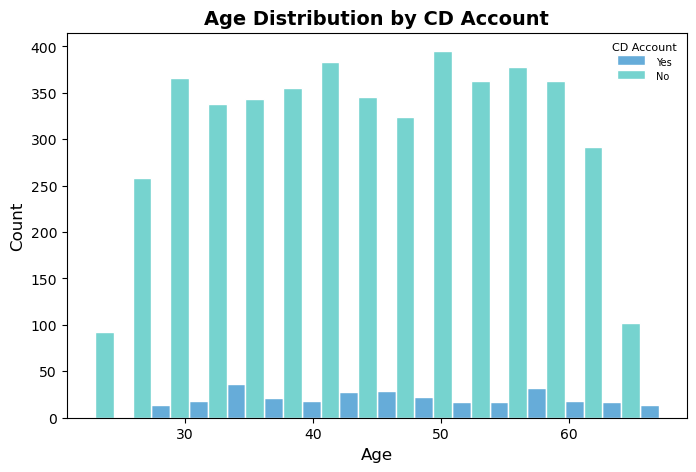

In [298]:
# Age distribution by CD Account
plt.figure(figsize=(8, 5))
sns.histplot(data=personal_loan, x="Age", hue="CD Account", hue_order=[0, 1],
            multiple="dodge", bins=15, alpha=0.6, edgecolor="white",
            palette=colors)  
plt.title("Age Distribution by CD Account", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tick_params(labelsize=10)

legend = plt.legend(title="CD Account", labels=['Yes', 'No'], frameon=False,
                   borderpad=0.2,
                   labelspacing=0.2)
plt.setp(legend.get_title(), fontsize=8)
plt.setp(legend.get_texts(), fontsize=7)

plt.show()


C:\Users\jiang\AppData\Local\Temp\ipykernel_16968\1819662898.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=personal_loan, x="Income", hue="CD Account", hue_order=[0, 1],


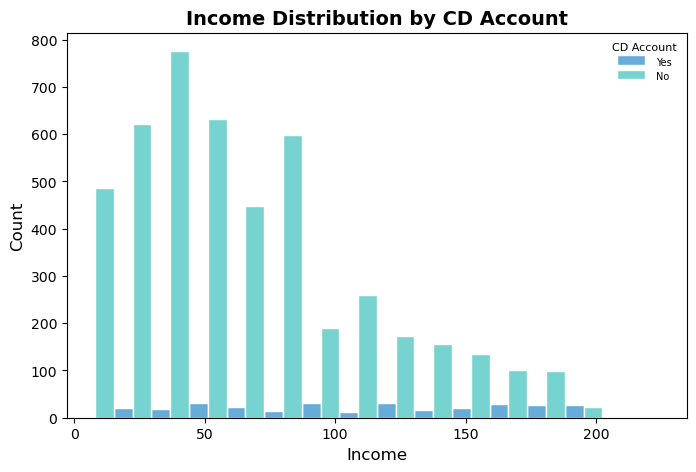

In [299]:
# Income distribution by CD Account
plt.figure(figsize=(8, 5))
sns.histplot(data=personal_loan, x="Income", hue="CD Account", hue_order=[0, 1],
            multiple="dodge", bins=15, alpha=0.6, edgecolor="white",
            palette=colors)  
plt.title("Income Distribution by CD Account", fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tick_params(labelsize=10)
legend = plt.legend(title="CD Account", labels=['Yes', 'No'], frameon=False,
                   borderpad=0.2,
                   labelspacing=0.2)
plt.setp(legend.get_title(), fontsize=8)
plt.setp(legend.get_texts(), fontsize=7)
plt.show()

##### Age distribution by CD Account with normalized percentages

C:\Users\jiang\AppData\Local\Temp\ipykernel_16968\934199014.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  age_distribution = sns.displot(


,Mean Age,Median Age,Std Age
CD Account,,,
No,45.3,45.0,11.5
Yes,45.7,45.0,11.4


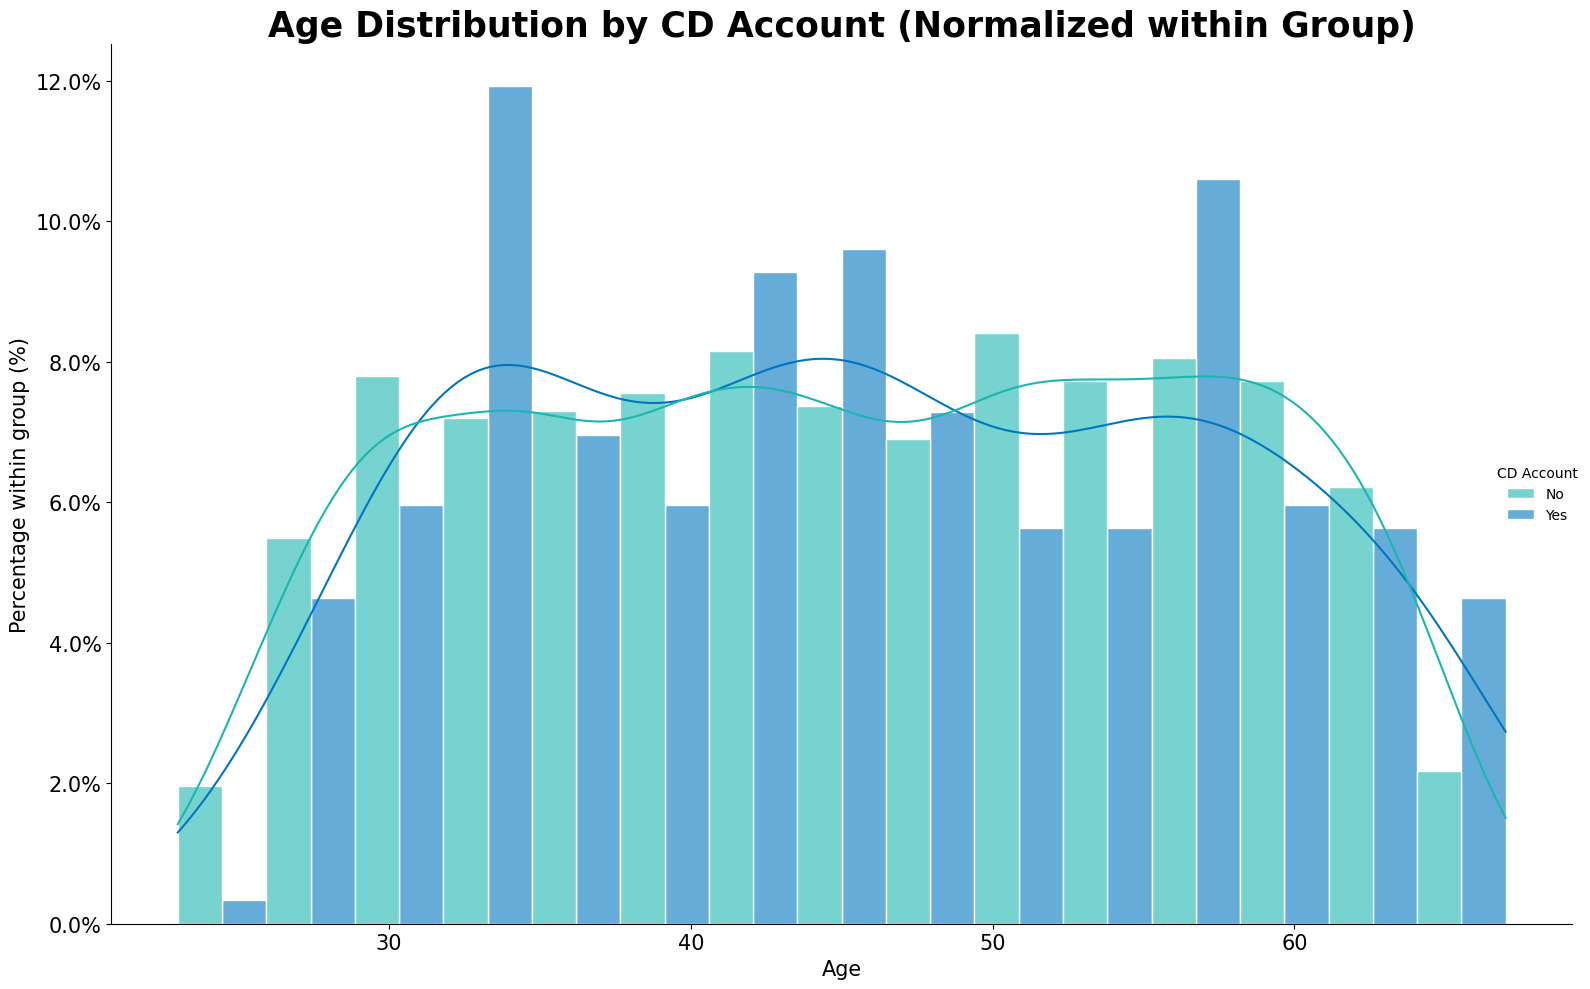

In [302]:
age_distribution = sns.displot(
    data=personal_loan,
    x="Age",
    hue="CD Account",
    stat="percent",
    hue_order=[0, 1],  
    common_norm=False,
    multiple="dodge",
    bins=15,
    kind="hist",  
    kde=True,     
    height=10,
    aspect=1.5,
    alpha=0.6,
    edgecolor="white",
    palette=colors
)

plt.title

new_labels = ['No', 'Yes']  
for t, l in zip(age_distribution._legend.texts, new_labels):
    t.set_text(l)

plt.title("Age Distribution by CD Account (Normalized within Group)", fontsize=25, fontweight='bold')
plt.xlabel("Age", fontsize=15)
plt.ylabel("Percentage within group (%)", fontsize=15)

age_distribution.ax.yaxis.set_major_formatter(PercentFormatter())
plt.tick_params(labelsize=15)
plt.grid(False)
plt.tight_layout()
# Summary statistics table for Age by CD Account
stats_data = []
for sec_value, label in [(0, "No"), (1, "Yes")]:
    group_data = personal_loan[personal_loan["CD Account"] == sec_value]["Age"]
    stats_data.append({
        'CD Account': label,
        'Mean Age': f"{group_data.mean():.1f}",
        'Median Age': f"{group_data.median():.1f}",
        'Std Age': f"{group_data.std():.1f}"
    })
stats_df = pd.DataFrame(stats_data)
stats_df.set_index('CD Account', inplace=True)
display(stats_df.style.set_caption("Age Statistics by CD Account Group"))

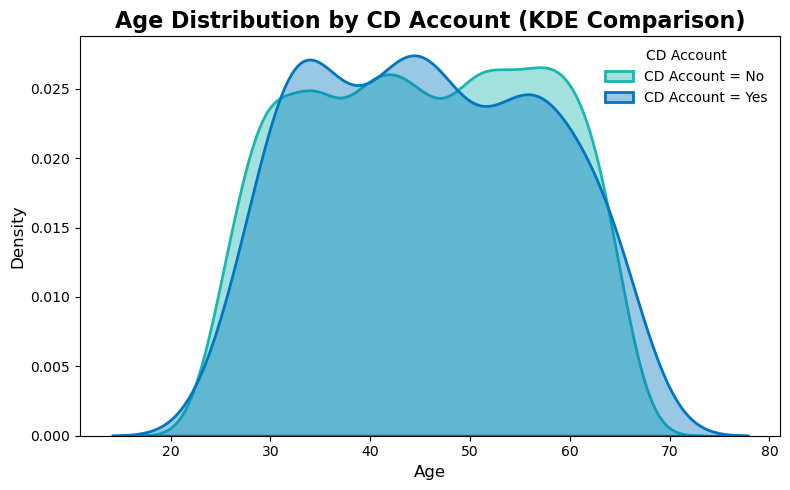

In [313]:
colors = ["#1BB6AFFF", "#0076C0FF"]  # No, Yes

plt.figure(figsize=(8, 5))

# Plot KDE lines for both groups
for value, label, color in zip([0, 1], ["No", "Yes"], colors):
    sns.kdeplot(
        data=personal_loan[personal_loan["CD Account"] == value],
        x="Age",
        fill=True,
        color=color,
        label=f"CD Account = {label}",
        linewidth=2,
        alpha=0.4
    )

# --- Formatting ---
plt.title("Age Distribution by CD Account (KDE Comparison)", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tick_params(labelsize=10)
plt.legend(title="CD Account", frameon=False, fontsize=10, title_fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()


##### Income distribution by CD Account with normalized percentages

C:\Users\jiang\AppData\Local\Temp\ipykernel_16968\3318878538.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  income_distribution = sns.displot(


,Mean Income,Median Income,Std Income
CD Account,,,
No,71.8,62.0,44.7
Yes,104.6,107.0,55.0


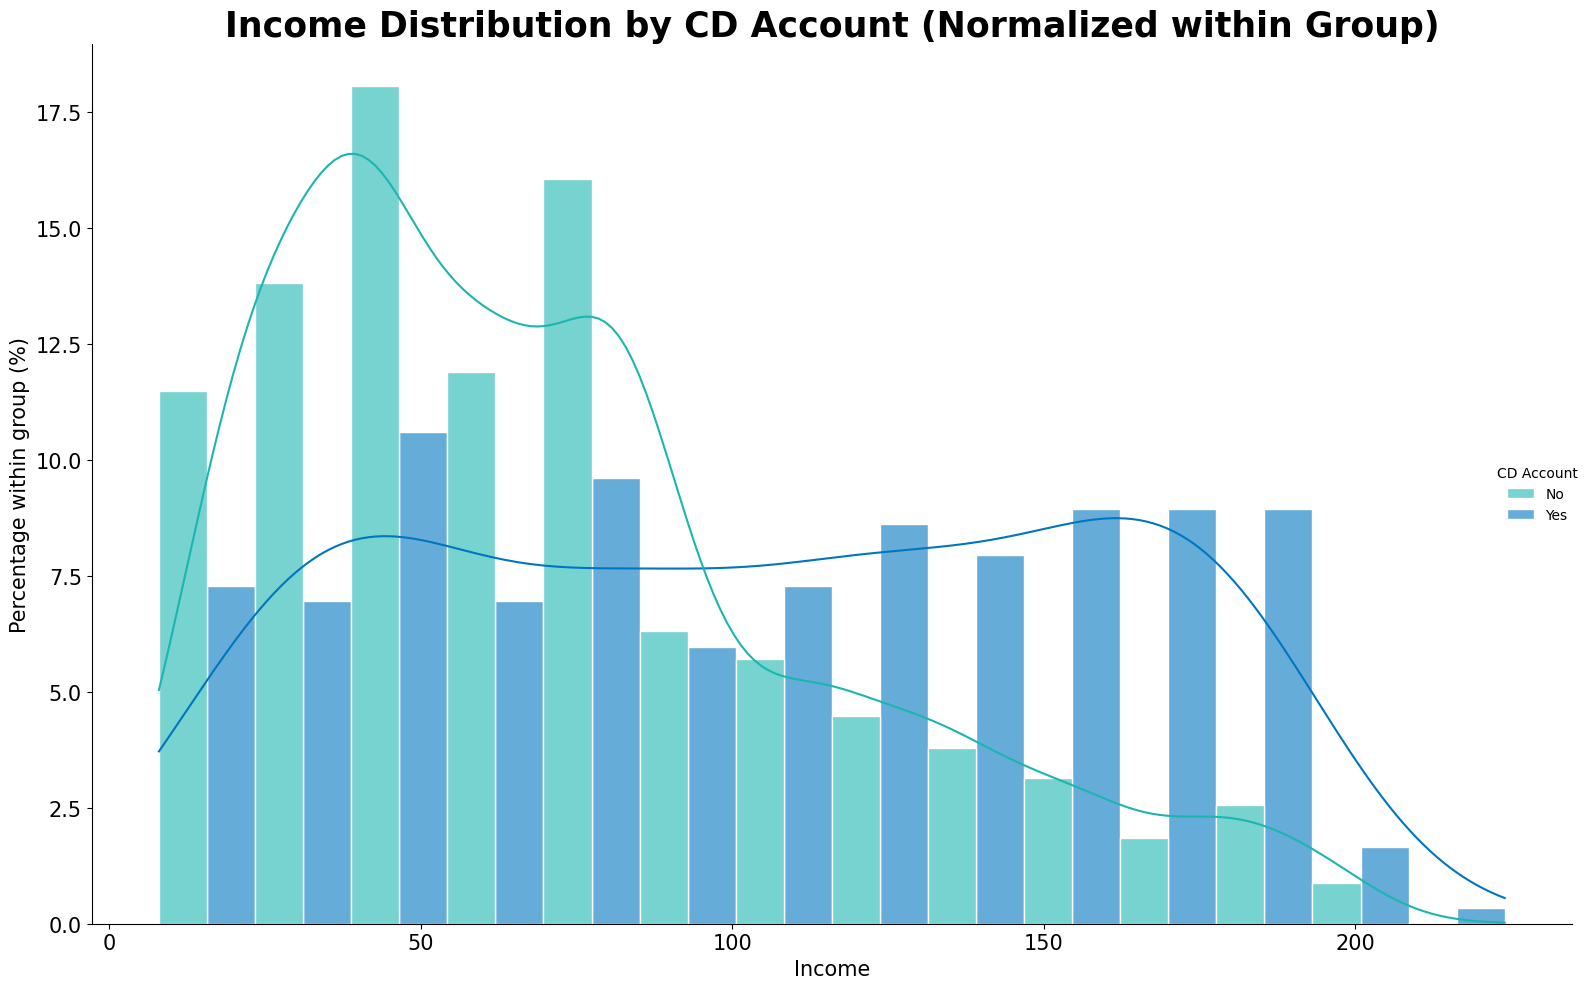

In [304]:
income_distribution = sns.displot(
    data=personal_loan,
    x="Income",
    hue="CD Account",
    stat="percent",
    hue_order=[0, 1],  
    common_norm=False,
    multiple="dodge",
    bins=14,
    kind="hist",  
    kde=True,     
    height=10,
    aspect=1.5,
    alpha=0.6,
    edgecolor="white",
    palette=colors
)

plt.title

new_labels = ['No', 'Yes']  
for t, l in zip(income_distribution._legend.texts, new_labels):
    t.set_text(l)

plt.title("Income Distribution by CD Account (Normalized within Group)", fontsize=25, fontweight='bold')
plt.xlabel("Income", fontsize=15)
plt.ylabel("Percentage within group (%)", fontsize=15)

age_distribution.ax.yaxis.set_major_formatter(PercentFormatter())
plt.tick_params(labelsize=15)
plt.grid(False)
plt.tight_layout()

# Summary statistics table for Income by CD Account
stats_data = []
for sec_value, label in [(0, "No"), (1, "Yes")]:
    group_data = personal_loan[personal_loan["CD Account"] == sec_value]["Income"]
    stats_data.append({
        'CD Account': label,
        'Mean Income': f"{group_data.mean():.1f}",
        'Median Income': f"{group_data.median():.1f}",
        'Std Income': f"{group_data.std():.1f}"
    })
stats_df = pd.DataFrame(stats_data)
stats_df.set_index('CD Account', inplace=True)
display(stats_df.style.set_caption("Income Statistics by CD Account Group"))

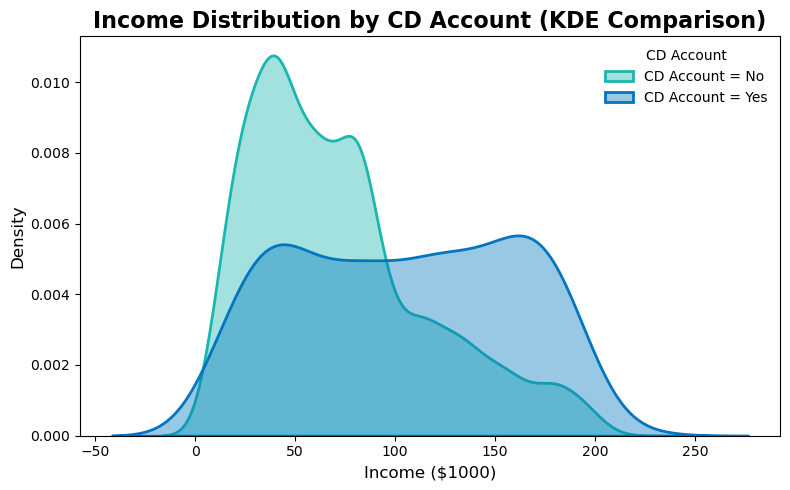

In [312]:
colors = ["#1BB6AFFF", "#0076C0FF"]  # No, Yes

plt.figure(figsize=(8, 5))

# Plot KDE lines for both groups
for value, label, color in zip([0, 1], ["No", "Yes"], colors):
    sns.kdeplot(
        data=personal_loan[personal_loan["CD Account"] == value],
        x="Income",
        fill=True,
        color=color,
        label=f"CD Account = {label}",
        linewidth=2,
        alpha=0.4
    )

# --- Formatting ---
plt.title("Income Distribution by CD Account (KDE Comparison)", fontsize=16, fontweight='bold')
plt.xlabel("Income ($1000)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tick_params(labelsize=10)
plt.legend(title="CD Account", frameon=False, fontsize=10, title_fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()


##### The distribution of Education by CD Account status

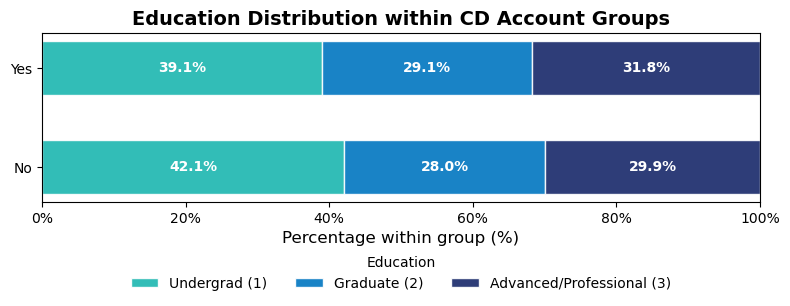

,Undergrad,Graduate,Advanced/Professional,Total,Average Education Level
No,"1,978","1,315","1,405","4,698",1.88
Yes,118,88,96,302,1.93


In [300]:
education_distribution = pd.crosstab(
    personal_loan["CD Account"],
    personal_loan["Education"],
    normalize="index"
) * 100
education_distribution = education_distribution[[1, 2, 3]] 

group_labels = education_distribution.index.map({0: "No", 1: "Yes"})           
seg_labels   = ["Undergrad (1)", "Graduate (2)", "Advanced/Professional (3)"]
colors       = ["#1BB6AFFF", "#0076C0FF", "#172869FF"]

fig, ax = plt.subplots(figsize=(8, 4))
left = np.zeros(len(education_distribution))  

for i, col in enumerate(education_distribution.columns):
    vals = education_distribution[col].values
    bars = ax.barh(group_labels, vals, left=left, height=0.55,
                   color=colors[i], edgecolor="white", alpha=0.9, label=seg_labels[i])
    for b, v in zip(bars, vals):
        if v >= 3:  
            ax.text(b.get_x() + b.get_width()/2, b.get_y() + b.get_height()/2,
                    f"{v:.1f}%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    left += vals

ax.set_xlim(0, 100)
ax.xaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel("Percentage within group (%)", fontsize=12)
ax.set_title("Education Distribution within CD Account Groups", fontsize=14, fontweight="bold")
ax.grid(False)
ax.legend(title="Education", ncol=3, bbox_to_anchor=(0.5, -0.6), loc="lower center", frameon=False)
plt.tight_layout()
plt.show()

# Calculate absolute counts for each group
edu_counts = pd.crosstab(
    personal_loan["CD Account"],
    personal_loan["Education"]
)

edu_counts.index = ["No", "Yes"]
edu_counts.columns = ["Undergrad", "Graduate", "Advanced/Professional"]

edu_counts["Total"] = edu_counts.sum(axis=1)

mean_edu = personal_loan.groupby("CD Account")["Education"].mean()
mean_edu.index = ["No", "Yes"]
edu_counts["Average Education Level"] = mean_edu.round(2)

edu_counts = edu_counts[["Undergrad", "Graduate", "Advanced/Professional", "Total", "Average Education Level"]]

styled_edu_counts = edu_counts.style\
    .set_caption("Education Distribution Analysis by CD Account Status")\
    .format({
        'Undergrad': '{:,.0f}',
        'Graduate': '{:,.0f}',
        'Advanced/Professional': '{:,.0f}',
        'Total': '{:,.0f}',
        'Average Education Level': '{:.2f}'
    })\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '14px'), 
                                        ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('text-align', 'center'), 
                                    ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

display(styled_edu_counts)

##### The number of customers - have one account only / have multiple accounts

In [ ]:
account_distribution = pd.crosstab(
    personal_loan["Securities Account"],
    personal_loan["CD Account"],
    margins=True
)

account_distribution.index = ["No Securities", "Has Securities", "Total"]
account_distribution.columns = ["No CD", "Has CD", "Total"]

no_accounts = account_distribution.iloc[0, 0]  # Neither Securities nor CD
only_securities = account_distribution.iloc[1, 0]  # Only Securities
only_cd = account_distribution.iloc[0, 1]  # Only CD
both_accounts = account_distribution.iloc[1, 1]  # Both Securities and CD

account_summary = pd.DataFrame({
    'Account Type': ['No Accounts', 'Only Securities Account', 'Only CD Account', 'Both Accounts'],
    'Count': [no_accounts, only_securities, only_cd, both_accounts],
    'Percentage': [
        no_accounts / len(personal_loan) * 100,
        only_securities / len(personal_loan) * 100,
        only_cd / len(personal_loan) * 100,
        both_accounts / len(personal_loan) * 100
    ]
})

styled_summary = account_summary.style\
    .set_caption("Customer Account Holdings Distribution")\
    .format({
        'Count': '{:,.0f}',
        'Percentage': '{:.1f}%'
    })\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '14px'),
                                        ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('text-align', 'center'),
                                    ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

print("\nSummary of Account Holdings:")
display(styled_summary)


Summary of Account Holdings:


,Account Type,Count,Percentage
0,No Accounts,"4,323",86.5%
1,Only Securities Account,375,7.5%
2,Only CD Account,155,3.1%
3,Both Accounts,147,2.9%


##### Q4 The most important factors in customers' favorable decision

##### Q5 The simple machine learning classification model